# Assignment 3 - basic classifiers

Math practice and coding application for main classifiers introduced in Chapter 3 of the Python machine learning book. 

## Weighting

Note that this assignment is more difficult than the previous ones, and thus has a higher weighting 3 and longer duration (3 weeks). Each one of the previous two assignments has a weighting 1.

Specifically, the first 3 assignments contribute to your continuous assessment as follows:

Assignment weights: $w_1 = 1, w_2 = 1, w_3 = 3$

Assignment grades: $g_1, g_2, g_3$

Weighted average: $\frac{1}{\sum_i w_i} \times \sum_i \left(w_i \times g_i \right)$

Future assignments will be added analogously.

# RBF kernel (20 points)

Show that a Gaussian RBF kernel can be expressed as a dot product:
$$
K(\mathbf{x}, \mathbf{y}) 
= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} 
= \phi(\mathbf{x})^T \phi(\mathbf{y})
$$
by spelling out the mapping function $\phi$.

For simplicity
* you can assume both $\mathbf{x}$ and $\mathbf{y}$ are 2D vectors
$
x =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
, \;
y =
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$
* we use a scalar unit variance here

even though the proof can be extended for vectors $\mathbf{x}$ $\mathbf{y}$ and general covariance matrices.

Hint: use Taylor series expansion of the exponential function

Answer:

$$
K(\mathbf{x}, \mathbf{y}) 
= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} 
= e^\frac{-||\mathbf{x}||^2 - ||\mathbf{y}||^2 + 2\mathbf{x}^{T}\mathbf{y}}{2} 
$$

$$
=exp\left(\frac{-||\mathbf{x}||^2 - ||\mathbf{y}||^2}{2}\right) exp\left(\mathbf{x}^{T}\mathbf{y}\right)
$$

because $exp\left(\frac{-||\mathbf{x}||^2 - ||\mathbf{y}||^2}{2}\right)$ is the constant that is not quite significant to the intepretation of Kernel function for proofing

so basically we focus on the $exp\left(\mathbf{x}^{T}\mathbf{y}\right)$ this part

Based on the tylor expansion:

$$
exp\left(\mathbf{x}^{T}\mathbf{y}\right) = 1 + \frac{\mathbf{x}^{T}\mathbf{y}}{1\,!}+\frac{\left(\mathbf{x}^{T}\mathbf{y}\right)^{2}}{2\,!}+\frac{\left(\mathbf{x}^{T}\mathbf{y}\right)^{3}}{3\,!}+...
$$

$$
=\sum_{t=1}^\infty \frac{(x_1y_1 + x_2y_2)^{t}}{t\,!}
$$

by binomial expansion we get to know that

$$
(x_1y_1 + x_2y_2)^{n} = \sum_i^{n} \left((x_1y_1)^{n-i}(x_2y_2)^{i}\right)
$$

so for every term in the taylor expansion i.e. $\frac{(x_1y_1 + x_2y_2)^{t}}{t\,!}$
we can see it as $(t+1)$ terms inner product

$$
\text{part of } \phi(\mathbf{X}) = \phi^{(t)}(\mathbf{X}) = \frac{1}{\sqrt{t\,!}}\left[\binom t0(x_1)^{t}, \binom t1(x_1)^{t-1}(x_2)^{1},...,\binom t{t-1}(x_1)^{t-1}(x_2)^{1},\binom tt(x_2)^{t}\right]
$$

$$
\text{part of } \phi(\mathbf{Y}) = \phi^{(t)}(\mathbf{Y}) = \frac{1}{\sqrt{t\,!}}\left[\binom t0(y_1)^{t}, \binom t1(y_1)^{t-1}(y_2)^{1},...,\binom t{t-1}(y_1)^{t-1}(y_2)^{1},\binom tt(y_2)^{t}\right]
$$

So we can express the transformation from $ \mathbf{X}, \mathbf{Y} $ using the token above


$$
\phi(\mathbf{X}) = \phi((x_1,x_2)) = \left[\phi^{(0)}(\mathbf{X}), \phi^{(1)}(\mathbf{X}), ... , \phi^{(t)}(\mathbf{X}), ..., \phi^{(\infty)}(\mathbf{X})\right]
$$

$$
=\left[1,\frac{1}{\sqrt{1\,!}}\binom 10x_1,\frac{1}{\sqrt{1\,!}}\binom 11x_2,...,\frac{1}{\sqrt{t\,!}}\binom t0(x_1)^{t}, \frac{1}{\sqrt{t\,!}}\binom t1(x_1)^{t-1}(x_2)^{1},...,\frac{1}{\sqrt{t\,!}}\binom t{t-1}(x_1)^{t-1}(x_2)^{1},\frac{1}{\sqrt{t\,!}}\binom tt(x_2)^{t},...\right]
$$


$$
\phi(\mathbf{Y}) = \phi((y_1,y_2)) = \left[\phi^{(0)}(\mathbf{Y}), \phi^{(1)}(\mathbf{Y}), ... , \phi^{(t)}(\mathbf{Y}), ..., \phi^{(\infty)}(\mathbf{Y})\right]
$$

$$
=\left[1,\frac{1}{\sqrt{1\,!}}\binom 10y_1,\frac{1}{\sqrt{1\,!}}\binom 11y_2,...,\frac{1}{\sqrt{t\,!}}\binom t0(y_1)^{t}, \frac{1}{\sqrt{t\,!}}\binom t1(y_1)^{t-1}(y_2)^{1},...,\frac{1}{\sqrt{t\,!}}\binom t{t-1}(y_1)^{t-1}(y_2)^{1},\frac{1}{\sqrt{t\,!}}\binom tt(y_2)^{t},...\right]
$$

# Kernel SVM complexity (10 points)

How would the complexity (or number of parameters) of a kernel SVM change with the amount of training data, and why?
Note that the answer may depend on the specific kernel used.
Consider specifically the following types of kernels $K(\mathbf{x}, \mathbf{y})$.
* linear:
$$
K\left(\mathbf{x}, \mathbf{y}\right) = \mathbf{x}^T \mathbf{y}
$$
* polynomial with degree $q$:
$$
K\left(\mathbf{x}, \mathbf{y}\right) =
(\mathbf{x}^T\mathbf{y} + 1)^q
$$
* RBF with distance function $D$:
$$
K\left(\mathbf{x}, \mathbf{y} \right) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}}
$$

Answer:

At frist we make some assumption:
1. the time of conduction a product operation use constant time $c_p$
2. the time of conduction a division operation use time $c_d$
3. the time of conduction a addition or subtraction operation use time $c$



$\textit{1}$. For linear kernel

the kernel map from a vector with $ \textit{d}$ dimention to $ \textit{d}$
typora
then for every dimention we need to perform one product on the kernel function

So the complexity of the linear kernel is

$$
Complexity(\text{linearKernel}) = O(dnc_p) = O(dn)
$$


$\textit{2}$. For polynomial kernel with degree q

the kernel map from a vector with $ \textit{d}$ dimention to $ \binom {q+d-1}{q}$

The complexity of the linear kernel is

$$
Complexity(\text{polynomialKernel}) = O(n(dc_p + c_e + c+logq)) = O(n(d+logq))
$$
(Note here we assume that exponential calculation has complexity of O(logn) where n is the degree)

$\textit{3}$. For RBF with distance function $D$:

the kernel map from a vector with $ \textit{d}$ dimention to infinity (as the first question shows)

The complexity of the linear kernel is

(Note that the $s$ has been decided by the argument in svm of $\gamma$ so we do not need to calculate it)

$$
Complexity(\text{rbfKernel}) = O(dn + dn + 4c_e + Xc) = O(dn) 
$$
(where X is a constant)

# Gaussian density Bayes (30 points)

$$
p\left(\Theta | \mathbf{X}\right)
= 
\frac{p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)}{p\left(\mathbf{X}\right)}
$$

Assume both the likelihood and prior have Gaussian distributions:

$$
\begin{align}
p(\mathbf{X} | \Theta)
&=
\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
\\
p(\Theta)
&=
\frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\end{align}
$$

Derive $\Theta$ from the dataset $\mathbf{X}$ via the following methods:

### ML (maximum likelihood) estimation 
$$
\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta)
$$

### MAP estimation
$$
\begin{align}
\Theta_{MAP} 
&= 
argmax_{\Theta} p(\Theta | \mathbf{X})
\\
&=
argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta)
\end{align}
$$

### Bayes estimation

$$
\begin{align}
\Theta_{Bayes} 
&= 
E(\Theta | \mathbf{X})
\\
&= 
\int \Theta p(\Theta | \mathbf{X}) d\Theta
\end{align}
$$

Answer:

$\textit{1}$.Using ML (maximum likelihood) estimation to get $ \mathbf{\Theta} $
$$
\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta)
$$
First we find the derivative of $p(\mathbf{X} | \Theta)$

$$
\begin{align}
\frac{\partial p(\mathbf{X} | \Theta)}{\partial \Theta} 
&= \frac{\partial \left(\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)\right)}{\partial \Theta}
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N} \frac{\partial \left(\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)\right)}{\partial \Theta}
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N} \left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)}{\sigma^2}\right) \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N}\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)}) - N\Theta}{\sigma^2}\right) \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
\end{align}
$$

Then we want to maximize $p(\mathbf{X} | \Theta)$ just let the derivative to be zero
which is
$$
\frac{1}{(2\pi)^{N/2}\sigma^N}\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)}) - N\Theta}{\sigma^2}\right) \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) = 0
$$
Then, because 
$$
 \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) > 0
$$

So

$$
\sum_{t=1}^N (\mathbf{x}^{(t)}) - N\Theta = 0
$$

So we got

$$
\Theta = \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}
$$

$\textit{2}.$Using MAP (maxium a postprior) estimation to get $ \mathbf{\Theta} $

Similar to the ML method, we firstly try to get the derivative of the expression ${\Theta} p(\Theta | \mathbf{X})$

$$
\begin{align}
\frac{\partial \left(p(\Theta) p(\mathbf{X} | \Theta)\right)}{\partial \Theta} 
&= \frac{\partial \left(\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)}{\partial \Theta}
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N \sqrt{2\pi}\sigma_0}\frac{\partial \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}  -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right) }{\partial \Theta}
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N \sqrt{2\pi}\sigma_0}\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)}{\sigma^2}  -\frac{(\Theta - \mu_0)}{\sigma_0^2}\right)\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}  -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right)
\end{align}
$$


Then we want to maximize $p(\mathbf{X} | \Theta)$ just let the derivative to be zero
which is

$$
\frac{1}{(2\pi)^{N/2}\sigma^N \sqrt{2\pi}\sigma_0}\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)}{\sigma^2}  -\frac{(\Theta - \mu_0)}{\sigma_0^2}\right)\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}  -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right) = 0
$$

Then, because 

$$
\exp\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}  -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right) > 0
$$

So 

$$
\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)}{\sigma^2}  -\frac{(\Theta - \mu_0)}{\sigma_0^2} = 0
$$

$$
\sigma_0^2(\sum_{t=1}^N \mathbf{x}^{(t)} - N\Theta) -\sigma^2(\Theta - \mu_0) = 0
$$

So we got

$$
\Theta =
\frac{N/\sigma^2}{N/\sigma^2 + 1/\sigma_0^2} \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}
+
\frac{1/\sigma_0^2}{N/\sigma^2 + 1/\sigma_0^2} \mu_0
$$


$\textit{3}$.Using Bayes estimation to get $ \mathbf{\Theta} $

$$
\begin{align}
\Theta 
&= 
E(\Theta | \mathbf{X})
\end{align}
$$

Intuitively, we need to find the distribution with respect to the random variable $(\Theta | \mathbf{X}) $

by derving to pdf(probability density function) of the distribution we can find the mean which is the $\Theta$

$$
\begin{align}
pdf(\Theta | \mathbf{X}) 
&= p(\Theta | \mathbf{X})
\\
&= \frac{p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)}{p\left(\mathbf{X}\right)}
\end{align}
$$

Becuase $\mathbf{X}$ is already known (the data set), and it's not related to the distribution of the $\Theta$ because we need to find the $\Theta$

So consider the following pdf

$$
\begin{align}
p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)
&=\left(\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N} \frac{1}{\sqrt{2\pi}\sigma_0}\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}  -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right)  
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N} \frac{1}{\sqrt{2\pi}\sigma_0}\exp\left(-\frac{\sum_{t=1}^N (\left(\mathbf{x}^{(t)}\right)^{2}) - 2\Theta\sum_{t=1}^N (\left(\mathbf{x}^{(t)}\right)) + N\Theta^{2}}{2\sigma^2}  -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right)  
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N} \frac{1}{\sqrt{2\pi}\sigma_0}\exp\left(-\frac{\sigma_0^2\sum_{t=1}^N (\left(\mathbf{x}^{(t)}\right)^{2}) - 2\sigma_0^2\Theta\sum_{t=1}^N (\left(\mathbf{x}^{(t)}\right)) + \sigma_0^2N\Theta^{2} + \sigma^2\Theta^2 -2\sigma^2\Theta\mu_0 + \mu_0^2\sigma^2 }{2\sigma^2\sigma_0^2}\right)  
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N} \frac{1}{\sqrt{2\pi}\sigma_0}\exp\left(-\frac{1}{2}\left(\left(\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}\right)\Theta^2 - 2\left(\frac{\sum_{t=1}^N\mathbf{X}^{(t)}}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right)\Theta + \left(\frac{\sum_{t=1}^N(\mathbf{X}^{(t)})^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right)\right)\right)
\end{align}
$$


here we may denote 
$
\mathbf{E} = \frac{\sum_{t=1}^N\mathbf{X}^{(t)}}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}
$
for easy of expression

So the expression above become 

$
\begin{align}
&=\frac{1}{(2\pi)^{N/2}\sigma^N} \frac{1}{\sqrt{2\pi}\sigma_0}\exp\left(-\frac{1}{2} \left(\frac{\sum_{t=1}^N(\mathbf{X}^{(t)})^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right)\right)\exp\left(-\frac{1}{2}\left(\left(\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}\right)\Theta^2 - 2\mathbf{E}\Theta\right)\right)
\\
&=\frac{1}{(2\pi)^{N/2}\sigma^N} \frac{1}{\sqrt{2\pi}\sigma_0}\exp\left(-\frac{1}{2}\left(\frac{\sum_{t=1}^N(\mathbf{X}^{(t)})^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}-\frac{\mathbf{E}^{2}}{\left(\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}\right)^{2}}\right)\right)\exp\left(-\frac{\left(\Theta - \frac{\mathbf{E}}{\left(\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}\right)}\right)^{2}}{2\frac{\mu^2\mu_0^2}{\mu^2+N\mu_0^2}}\right)
\end{align}
$

we can find that it's a scaled normal distribution with a constant which however does not change its means

$$
E(\Theta | \mathbf{X}) = \text{means of pdf()} = \frac{\mathbf{E}}{\left(\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}\right)}
$$

then we plug back to the expression $\mathbf{E}$
So we got the result same as the second method using method MAP

$$
\Theta =
\frac{N/\sigma^2}{N/\sigma^2 + 1/\sigma_0^2} \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}
+
\frac{1/\sigma_0^2}{N/\sigma^2 + 1/\sigma_0^2} \mu_0
$$





# Hand-written digit classification (40 points)

In the textbook sample code we applied different scikit-learn classifers for the Iris data set.

In this exercise, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN
* naive Bayes

The dataset is available as part of scikit learn, as follows.

## Load data

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

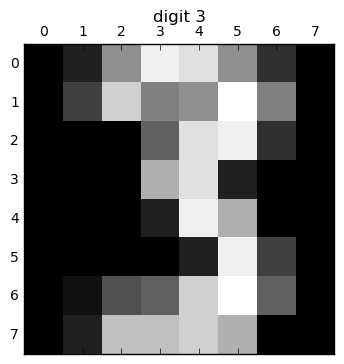

In [24]:
%matplotlib inline
import pylab as pl

index = 13
pl.gray()
pl.matshow(digits.images[index])
pl.title('digit ' + str(digits.target[index]))
pl.show()

## Date Preprocessing
Hint: How you divide training and test data set? And apply other techinques we have learned if needed.
You could take a look at the Iris data set case in the textbook.

In [25]:
#Your code comes here
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler



# splitting data into 80% training and 20% test data: 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)



sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#here we want to test the c


## Classifier #1 Perceptron

In [26]:
#Your code, including traing and testing, to observe the accuracies.

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import math




perceptron = Perceptron(n_iter=10, verbose=0, fit_intercept=True, eta0=0.1, random_state=0, penalty = 'l2', alpha = 0.1**4)
perceptron.fit(X_train_std, y_train)
y_pred = perceptron.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))




Misclassified samples: 22 out of 360
Accuracy: 0.9389


## Classifier #2 Logistic Regression

In [27]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression



# test the influence of C (regularization strength)

logisticRegression = LogisticRegression(C=10, random_state=0)
logisticRegression.fit(X_train_std, y_train)
y_pred = logisticRegression.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))



Misclassified samples: 13 out of 360
Accuracy: 0.9639


## Classifier #3 SVM

In [28]:
#Your code, including traing and testing, to observe the accuracies.

from sklearn.svm import SVC


svm = SVC(kernel='poly', C=10, random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))


Misclassified samples: 4 out of 360
Accuracy: 0.9889


## Classifier #4 Decision Tree

In [29]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion="entropy",random_state=0, max_depth = 10)
decisionTree.fit(X_train_std, y_train)
y_pred = decisionTree.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))


Misclassified samples: 41 out of 360
Accuracy: 0.8861


## Classifer #5 Random Forest

In [30]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier


randomForest = RandomForestClassifier(criterion='gini',
                                n_estimators=50, 
                                random_state=0,
                                n_jobs=-1)
randomForest.fit(X_train_std, y_train)
y_pred = randomForest.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))


Misclassified samples: 10 out of 360
Accuracy: 0.9722


## Classifier #6 KNN

In [31]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', algorithm = 'auto')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))


Misclassified samples: 5 out of 360
Accuracy: 0.9861


## Classifier #7 Naive Bayes

In [32]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB


bnb = BernoulliNB()
bnb.fit(X_train_std, y_train)
y_pred = bnb.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))



Misclassified samples: 46 out of 360
Accuracy: 0.8722


# Analysis:

Here is the result for the test:

In [33]:
from pandas import DataFrame
classifiersName =["perceptron", "logistic regression", "SVM", "decision tree", "random forest", "KNN", "naive Bayes"]
classifiers = [perceptron, logisticRegression, svm, decisionTree, randomForest, knn, bnb]
score = [accuracy_score(y_test, i.predict(X_test_std)) for i in classifiers]
combineResults = []
for i in range(7):
    combineResults.append({'classifier' : classifiersName[i], 'accuracy' :score[i]})

df = DataFrame(data=combineResults)
df.sort_values(by='accuracy', ascending=False)




,accuracy,classifier
2,0.988889,SVM
5,0.986111,KNN
4,0.972222,random forest
1,0.963889,logistic regression
0,0.938889,perceptron
3,0.886111,decision tree
6,0.872222,naive Bayes


Through at least 10 tests, we can find that SVM are have obvious advantage in terms of high accuracy.
This is mainly because SVM are better dealing with clustering data when all the data are close with each other in the same sets and different sets are comparatively far away from each other.

And as for the worst model for this dataset, decision tree may be the one. The reason could be in the following that:
1. Decision tree treat every feature useful where the outer pixel maybe always has low value in gray scale and they are usually of no use for classfication.
2. Decision tree once only take one feature to split data which may ignore some combinational relationship (like two feature combined has better impact on the spliting)
3. Sometimes decision tree without smart pruning can be overfitting with low accuracy in terms of test case.
4. Decision tree only care about information gain rather than class. For example, if there is two ways to split current data into two sets, two have close information gain, it is possible that the one having a bit lower information gain could benefit next spliting more than the one with higher infomation gain. 